# Presenting the project 

## Retriving data from kaggle

In [32]:
#! pip install -q kaggle
#! kaggle datasets download -d mysarahmadbhat/airbnb-listings-reviews

## Imports


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os
import pandas as pd
import numpy as np

In [61]:
# Specify the path to the zip file and the destination folder
#zip_file_path = "../notebooks/airbnb-listings-reviews.zip"
#destination_folder = "../data/raw"
#    
## Create the destination folder if it does not exist
#os.makedirs(destination_folder, exist_ok=True)
#
## Unzip the file
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall(destination_folder)
#
#print("Unzipping completed.")

## Loading data using pandas

In [4]:
# Directory containing the CSV files
csv_directory = '../data/raw/Airbnb Data'

# Getting a list of all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Dictionary to hold DataFrames
dataframes = {}

# Loop through the list and read each CSV file into a DataFrame
for csv_file in csv_files:
    df_name = os.path.splitext(csv_file)[0]
    file_path = os.path.join(csv_directory, csv_file)
    print(f"Reading file: {file_path}")  # Updated print statement for clarity
    try:
        # Attempt to read the CSV with a specific encoding
        dataframes[df_name] = pd.read_csv(file_path, encoding='utf-8')  # Default encoding
    except UnicodeDecodeError:
        try:
            dataframes[df_name] = pd.read_csv(file_path, encoding='ISO-8859-1')  # Alternative encoding
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Optional: Print out the keys to verify DataFrames are loaded
print("DataFrames loaded:", dataframes.keys())

# Optional: Print the first few rows of each DataFrame to verify content
for df_name, df in dataframes.items():
    print(f"First few rows of {df_name}:")
    print(df.head())

Reading file: ../data/raw/Airbnb Data\Listings.csv


C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\3225136949.py:20: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[df_name] = pd.read_csv(file_path, encoding='ISO-8859-1')  # Alternative encoding


Reading file: ../data/raw/Airbnb Data\Listings_data_dictionary.csv
Reading file: ../data/raw/Airbnb Data\Reviews.csv
Reading file: ../data/raw/Airbnb Data\Reviews_data_dictionary.csv
DataFrames loaded: dict_keys(['Listings', 'Listings_data_dictionary', 'Reviews', 'Reviews_data_dictionary'])
First few rows of Listings:
   listing_id                                              name   host_id  \
0      281420    Beautiful Flat in le Village Montmartre, Paris   1466919   
1     3705183                   39 mÃÂ² Paris (Sacre CÃâur)  10328771   
2     4082273               Lovely apartment with Terrace, 60m2  19252768   
3     4797344               Cosy studio (close to Eiffel tower)  10668311   
4     4823489  Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   

   host_since                 host_location host_response_time  \
0  2011-12-03  Paris, Ile-de-France, France                NaN   
1  2013-11-29  Paris, Ile-de-France, France                NaN   
2  2014-07-31  Pari

In [5]:
#Listings'	'Listings_data_dictionary'	'Reviews'	'Reviews_data_dictionary
Listings = dataframes['Listings']
Listings_data_dictionary = dataframes['Listings_data_dictionary']
Reviews = dataframes['Reviews']
Reviews_data_dictionary = dataframes['Reviews_data_dictionary']

In [6]:
# List of keywords
keywords = ['Paris', 'france', 'ile de france', 'Fr']

# Create a regex pattern from the keywords
pattern = '|'.join(keywords)

# Filter listings to focus on France where all specified columns contain one of the keywords
paris_listing = Listings[
    (Listings['name'].str.contains(pattern, case=False, na=False)) &
    (Listings['city'].str.contains(pattern, case=False, na=False)) &
    (Listings['host_location'].str.contains(pattern, case=False, na=False)) 
]

In [7]:
paris_listing.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1.916700e+04,1.916700e+04,6532.000000,9030.000000,19167.000000,19167.000000,19167.000000,19167.000000,15068.000000,19167.000000,19167.000000,19167.000000,14553.000000,14540.000000,14543.000000,14538.000000,14543.000000,14540.000000,14539.000000
mean,2.412890e+07,8.392459e+07,0.846796,0.790177,6.533626,48.862338,2.347820,3.019669,1.378949,107.025043,5.475766,670.655554,93.266268,9.616300,9.208623,9.718324,9.745376,9.683700,9.292317
std,1.418755e+07,1.004213e+08,0.299857,0.315590,29.159722,0.018473,0.033240,1.583292,1.068324,188.905442,74.675656,892.168177,8.733782,0.828192,1.111357,0.729848,0.717970,0.697945,0.931911
min,9.952000e+03,6.792000e+03,0.000000,0.000000,0.000000,48.813170,2.228680,0.000000,1.000000,0.000000,1.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.206284e+07,1.250469e+07,0.890000,0.670000,1.000000,48.848685,2.326770,2.000000,1.000000,58.000000,2.000000,30.000000,90.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.430128e+07,3.662692e+07,1.000000,0.970000,1.000000,48.864510,2.350420,2.000000,1.000000,80.000000,2.000000,1125.000000,96.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
75%,3.686787e+07,1.249629e+08,1.000000,1.000000,2.000000,48.875640,2.372855,4.000000,2.000000,115.000000,4.000000,1125.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.809147e+07,3.874948e+08,1.000000,1.000000,302.000000,48.904720,2.465740,16.000000,50.000000,9280.000000,9999.000000,99999.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
paris_listing.head(4)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
15,11643413,Luminous & very cosy flat in Paris,34678556,2015-05-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
21,13013700,40m2 lovely parisien flat - southpi,4177948,2012-11-18,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [10]:
print(paris_listing.columns)

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')


### keeping Text cols for NLP modeling 

In [14]:
nlp_paris_listing = paris_listing

## Select columns for modeling

In [8]:
modeling_cols = ['listing_id','host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms','price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable']

In [9]:
paris_listing = paris_listing[modeling_cols]
paris_listing.tail(2)

,listing_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
279705,38008602,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Enclos-St-Laurent,...,2,365,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


## Handling Missing Values
- viz the missing values and there respective cols 

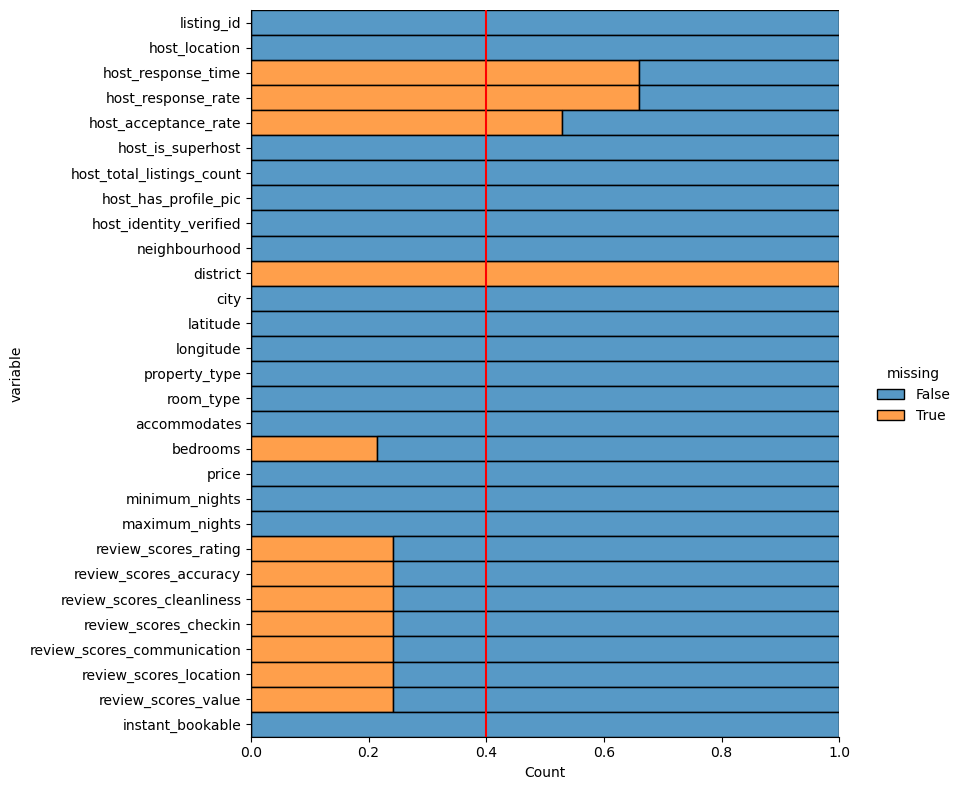

In [10]:
# number and percentage of missing values according to columns
{col: [paris_listing[col].isnull().sum(), 
       f'% {np.round(np.mean(paris_listing[col].isnull()*100), 3)}'
       ] for col in paris_listing.columns if paris_listing[col].isnull().any()}

sns.displot(
    data = paris_listing.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

plt.axvline(0.4, color='r')

Column district holds unique values : [nan	'Manhattan'	'Brooklyn']	and due to the absense of other countries and France we decided to drop the column it would be relevent for Us and specificly Nyc brooklyn New jersey Area

In [11]:
# Drop the 'district' column
paris_listing.drop(columns=['district'], inplace=True)
nlp_paris_listing.drop(columns=['district'], inplace=True)

## Review on the missing data 
- Columns with Few Missing Values (up to 200 missing)
    - name (63 missing)
    - host_since (33 missing)
    - host_location (168 missing)
    - host_is_superhost (33 missing)
    - host_total_listings_count (33 missing)
    - host_has_profile_pic (33 missing)
    - host_identity_verified (33 missing)

These columns have relatively few missing values, which can be handled through imputation or simply dropping the rows if the missing data is not significant.


In [15]:
paris_listing.dropna(subset=[
                             'host_location', 
                             'host_is_superhost', 
                             'host_total_listings_count', 
                             'host_has_profile_pic', 
                             'host_identity_verified'], inplace=True)

nlp_paris_listing.dropna(subset=[
                             'host_location', 
                             'host_is_superhost', 
                             'host_total_listings_count', 
                             'host_has_profile_pic', 
                             'host_identity_verified'], inplace=True)

C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\80445109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_listing.dropna(subset=[
C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\80445109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_paris_listing.dropna(subset=[


### bedrooms var 

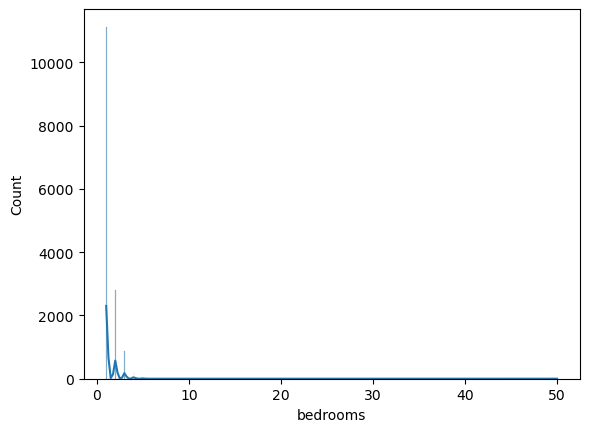

In [13]:
# Visualizing the distribution of the 'bedrooms' column
sns.histplot(paris_listing['bedrooms'].dropna(), kde=True)
plt.show()

rq : not dist normally , high right skew 

In [14]:
median_bedrooms = paris_listing['bedrooms'].median()
paris_listing['bedrooms'].fillna(median_bedrooms, inplace=True)

In [16]:
median_bedrooms = nlp_paris_listing['bedrooms'].median()
nlp_paris_listing['bedrooms'].fillna(median_bedrooms, inplace=True)

C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\1481114559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_paris_listing['bedrooms'].fillna(median_bedrooms, inplace=True)


### host 

In [16]:
paris_listing.dropna(subset=['host_location'], inplace=True)

In [17]:
nlp_paris_listing.dropna(subset=['host_location'], inplace=True)

C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\3799457321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_paris_listing.dropna(subset=['host_location'], inplace=True)


In [22]:
def get_unique(paris_listing, columns):
    unique_values = {column: paris_listing[column].unique() for column in columns}

    # Output the unique values
    for column, values in unique_values.items():
        print(f"Unique values in {column}:")
        print(values)
        print("\n")

# Example usage:
columns_to_check = ['host_response_time', 'host_response_rate', 'host_acceptance_rate']
get_unique(paris_listing, columns_to_check)

Unique values in host_response_time:
['within a day' 'within an hour' 'within a few hours' 'a few days or more']


Unique values in host_response_rate:
[1.   0.5  0.   0.67 0.83 0.86 0.9  0.79 0.75 0.94 0.95 0.25 0.8  0.6
 0.33 0.43 0.84 0.87 0.38 0.7  0.76 0.92 0.78 0.44 0.3  0.1  0.4  0.2
 0.17 0.57 0.56 0.77 0.71 0.88 0.89 0.96 0.97 0.65 0.99 0.98 0.93 0.73
 0.72 0.36 0.81 0.29 0.63 0.85 0.91 0.64 0.07 0.82 0.22 0.42 0.59 0.61
 0.06 0.14 0.12 0.05 0.11 0.46]


Unique values in host_acceptance_rate:
[1.         0.5        0.9        0.83       0.79017719 0.
 0.24       0.33       0.86       0.81       0.99       0.93
 0.67       0.88       0.75       0.94       0.77       0.4
 0.46       0.63       0.62       0.8        0.87       0.22
 0.95       0.91       0.17       0.97       0.89       0.96
 0.6        0.79       0.84       0.92       0.71       0.57
 0.25       0.48       0.56       0.82       0.85       0.47
 0.65       0.98       0.43       0.72       0.2        0.64
 0.45   

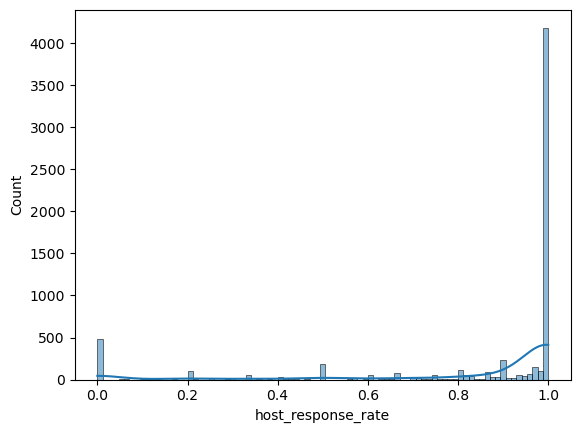

In [18]:
# Visualizing the distribution of the 'bedrooms' column
sns.histplot(paris_listing['host_response_rate'].dropna(), kde=True)
plt.show()

In [19]:
def impute_num_based_on_dist(df, col):
    if df[col].skew() > 1:  # If skewness is high (right-skewed)
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

impute_num_based_on_dist(paris_listing, 'host_response_rate')
impute_num_based_on_dist(paris_listing, 'host_acceptance_rate')
paris_listing.dropna(subset=['host_response_time'], inplace=True)

C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\340270290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\340270290.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_listing.dropna(subset=['host_response_time'], inplace=True)


In [20]:
impute_num_based_on_dist(nlp_paris_listing, 'host_response_rate')
impute_num_based_on_dist(nlp_paris_listing, 'host_acceptance_rate')
nlp_paris_listing.dropna(subset=['host_response_time'], inplace=True)

C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\340270290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\418741257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_paris_listing.dropna(subset=['host_response_time'], inplace=True)


In [23]:
columns_to_check = ['review_scores_rating',
                    'review_scores_accuracy',
                    'review_scores_cleanliness',
                    'review_scores_checkin',
                    'review_scores_communication',
                    'review_scores_location',
                    'review_scores_value']
#get_unique(paris_listing, columns_to_check)
get_unique(nlp_paris_listing, columns_to_check)

Unique values in review_scores_rating:
[ nan  95.  92.  84.  90.  85.  87.  70.  89.  91.  88.  93.  94.  75.
  86. 100.  97.  99.  98.  96.  69.  40.  76.  83.  81.  80.  82.  20.
  73.  65.  60.  50.  72.  71.  77.  66.  68.  53.  78.  64.  67.  30.
  57.]


Unique values in review_scores_accuracy:
[nan 10.  9.  8.  5.  2.  7.  4.  6.  3.]


Unique values in review_scores_cleanliness:
[nan 10.  8.  9.  6.  7.  5.  2.  4.]


Unique values in review_scores_checkin:
[nan 10.  9.  8.  6.  7.  2.  4.  5.  3.]


Unique values in review_scores_communication:
[nan  9.  8. 10.  5.  7.  2.  4.  6.]


Unique values in review_scores_location:
[nan 10.  9.  8.  4.  7.  2.  6.  5.]


Unique values in review_scores_value:
[nan 10.  9.  8.  7.  4.  6.  2.  5.  3.]




In [21]:
# create a list with the names of numerical columns data
numerics = ['review_scores_rating',
            'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location', 'review_scores_value']
#using the above columns list and price create a new dataframe
numeric_df = paris_listing[numerics + ['price']]

#calculate correlation matrix
correlation_matrix = numeric_df.corr()

#sorting the matrix by price in descending order
price_correlation = correlation_matrix['price'].sort_values(ascending = False)

#print the attributes that have highest correlation with price
print(price_correlation)

price                          1.000000
review_scores_cleanliness      0.025314
review_scores_location         0.013218
review_scores_rating           0.007350
review_scores_value           -0.021924
review_scores_accuracy        -0.026524
review_scores_communication   -0.028891
review_scores_checkin         -0.040441
Name: price, dtype: float64


In [22]:
# Drop rows with missing values in review score columns
paris_listing_clean = paris_listing.dropna(subset=['review_scores_location', 
                            'review_scores_value', 
                            'review_scores_checkin', 
                            'review_scores_communication','review_scores_rating'])

In [24]:
nlp_paris_listing_clean = nlp_paris_listing.dropna(subset=['review_scores_location', 
                            'review_scores_value', 
                            'review_scores_checkin', 
                            'review_scores_communication','review_scores_rating'])

In [23]:
paris_listing_clean.head(3)

,listing_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
26291,8134584,"Val-de-Marne, Ile-de-France, France",within an hour,1.0,1.0,t,1.0,t,t,Hotel-de-Ville,...,2,1125,95.0,10.0,10.0,10.0,9.0,10.0,10.0,t
26292,11433504,FR,within an hour,1.0,1.0,f,1.0,t,t,Luxembourg,...,30,1125,92.0,10.0,10.0,10.0,9.0,10.0,9.0,f
26297,19444226,FR,within an hour,1.0,1.0,f,1.0,t,t,Elysee,...,1,1125,84.0,9.0,8.0,9.0,9.0,10.0,8.0,t


In [26]:
#nlp_paris_listing_clean

In [26]:
paris_listing_clean.dtypes

listing_id                       int64
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location   

In [28]:
# Ensure numeric columns are properly typed
paris_listing_clean['latitude'] = paris_listing_clean['latitude'].astype(float)
paris_listing_clean['longitude'] = paris_listing_clean['longitude'].astype(float)
paris_listing_clean['bedrooms'] = paris_listing_clean['bedrooms'].astype(float)
paris_listing_clean['price'] = paris_listing_clean['price'].astype(float)  # Ensure price is float

# Drop columns that won't be used for numerical analysis
#paris_listing_clean.drop(['name', 'amenities', 'property_type', 'room_type', 'neighbourhood', 'city'], axis=1, inplace=True)

C:\Users\Faical\AppData\Local\Temp\ipykernel_15816\795684292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_listing_clean['latitude'] = paris_listing_clean['latitude'].astype(float)
C:\Users\Faical\AppData\Local\Temp\ipykernel_15816\795684292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_listing_clean['longitude'] = paris_listing_clean['longitude'].astype(float)
C:\Users\Faical\AppData\Local\Temp\ipykernel_15816\795684292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

In [27]:
nlp_paris_listing_clean['latitude'] = nlp_paris_listing_clean['latitude'].astype(float)
nlp_paris_listing_clean['longitude'] = nlp_paris_listing_clean['longitude'].astype(float)
nlp_paris_listing_clean['bedrooms'] = nlp_paris_listing_clean['bedrooms'].astype(float)
nlp_paris_listing_clean['price'] = nlp_paris_listing_clean['price'].astype(float)  # Ensure price is float

C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\3711698143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_paris_listing_clean['latitude'] = nlp_paris_listing_clean['latitude'].astype(float)
C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\3711698143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_paris_listing_clean['longitude'] = nlp_paris_listing_clean['longitude'].astype(float)
C:\Users\Faical\AppData\Local\Temp\ipykernel_6776\3711698143.py:3: SettingWithCopyWarning: 
A value is tryin

In [28]:
nlp_paris_listing_clean.head(3)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
26291,8134584,Paris Seine 4th arrondissement,42957416,2015-08-31,"Val-de-Marne, Ile-de-France, France",within an hour,1.0,1.0,t,1.0,...,2,1125,95.0,10.0,10.0,10.0,9.0,10.0,10.0,t
26292,11433504,Cosy Parisian Flat,60071914,2016-02-23,FR,within an hour,1.0,1.0,f,1.0,...,30,1125,92.0,10.0,10.0,10.0,9.0,10.0,9.0,f
26297,19444226,Spacious flat just two minutes from Champs-Ely...,136191956,2017-06-21,FR,within an hour,1.0,1.0,f,1.0,...,1,1125,84.0,9.0,8.0,9.0,9.0,10.0,8.0,t


In [30]:
# save as csv
path = "../data/processed/"

paris_listing_clean.to_csv(path + 'paris_listing_clean_new')


In [29]:

path_nlp_paris_listing_clean = "../data/processed/nlp_paris_listing_clean_new.csv"

nlp_paris_listing_clean.to_csv(path_nlp_paris_listing_clean)